In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mplhep.plot import histplot

In [2]:
lumis = np.array([4.1,41.,100.0,200.0])

massScales= np.array([np.load("L%ifb2TFScanWJets_massScales.npy"%int(lumi)) for lumi in lumis])

In [5]:
def plot_massScales(QCDPT=1,QCDRHO=3,PT=4,RHO=4):
    central = massScales[:,QCDPT,QCDRHO,PT,RHO,0,0]
    error_up = massScales[:,QCDPT,QCDRHO,PT,RHO,0,1]
    error_down = massScales[:,QCDPT,QCDRHO,PT,RHO,0,1]
    
    fig, axes = plt.subplots(2,1,sharex=True,figsize=(12, 12))
    (ax,ax1) = axes.T.flatten()

    ax.plot(lumis, central,'k-', label="center")
    ax.plot(lumis, central+error_up,'b--', label="+$\sigma$")
    ax.plot(lumis, central-error_down,'b--', label="-$\sigma$")
    ax.set_ylabel("massScale")
    ax.set_xlabel("Integrated Luminosity [fb$^-1$]")
    ax.set_xticks(lumis)
    ax.legend()
    
    ax1.plot(lumis, abs(error_up/central), 'b', label='up')    
    ax1.plot(lumis, abs(error_down/central), 'r--', label='down')
    ax1.set_ylabel('rel. uncertaintie')
    ax1.legend()
    plt.savefig('plots/massScale_v_Lumi_TF%i%i%i%i.pdf'%(QCDPT,QCDRHO,PT,RHO))

In [6]:
from ipywidgets import interactive, GridBox, Layout
iplot = interactive(
    plot_massScales,
    QCDPT=(1,5,1),
    QCDRHO=(1,5,1),
    PT=(1,5,1),
    RHO=(1,5,1)
)

controls = GridBox(iplot.children[:-1], layout=Layout(grid_template_columns="repeat(3, 300px)"))
display(controls, iplot.children[-1])

GridBox(children=(IntSlider(value=1, description='QCDPT', max=5, min=1), IntSlider(value=3, description='QCDRH…

Output()

In [69]:
center = massScales[1,:,:,:,:,0,0]
error_up = massScales[1,:,:,:,:,0,1]
error_down = massScales[1,:,:,:,:,0,2]

In [70]:
rel_unc = abs(error_up/center)
rel_unc[center==0.0]=10
rel_unc[error_down==0.0]=10
rel_unc[rel_unc==0.0]=10
rel_unc[center<0.9] = 10
rel_unc[center>1.1] = 10

In [75]:
minimum_unc = np.amin(rel_unc)
print(minimum_unc)
min_index = np.where(rel_unc == minimum_unc)
print('minimum rel. massScaleUncertainty at ', min_index,': massScale:',massScales[1][min_index],', rel.Unc',minimum_unc)

0.6667936708243125
minimum rel. massScaleUncertainty at  (array([3]), array([1]), array([3]), array([5])) : massScale: [[[1.07965261 0.71990553 0.71990553]]] , rel.Unc 0.6667936708243125


In [76]:
np.where(np.array([2,3,2,4,5,2]) == 2)

(array([0, 2, 5]),)

In [81]:
def get_minimum_rel_uncertainty(lumi_index):
    print('Lumi: %.1f fb^-1'%lumis[lumi_index])
    center = massScales[lumi_index,:,:,:,:,0,0]
    error_up = massScales[lumi_index,:,:,:,:,0,1]
    error_down = massScales[lumi_index,:,:,:,:,0,2]
    rel_unc = abs(error_up/center)
    #"masking" failed fits, i.e. center==0 or error_down==0 or error_up==0
    rel_unc[center==0.0]=10
    rel_unc[error_down==0.0]=10
    rel_unc[error_up==0.0]=10
    #"masking" fits where massScale is unreasonably large
    rel_unc[center<0.9] = 10
    rel_unc[center>1.1] = 10
    minimum_unc = np.amin(rel_unc)
    min_index = np.where(rel_unc == minimum_unc)
    print('minimum rel. massScaleUncertainty at ', min_index,': massScale:',massScales[lumi_index][min_index],', rel.Unc',minimum_unc)
    

In [195]:
def plot_TF_scan_overview(lumi_index):
    central_flat = massScales[lumi_index,1:,1:,1:,1:,0,0].flatten()
    error_up_flat = massScales[lumi_index,1:,1:,1:,1:,0,1].flatten()
    rel_unc = abs(error_up_flat/central_flat)
    TF_orders_flat = np.linspace(1,central_flat.shape[0],central_flat.shape[0])
    TF_names_flat = np.array(['TF%ix%i|TF%ix%i'%(l,k,j,i) for l in range(1,6) for k in range(1,6) for j in range(1,6) for i in range(1,6)])
    central_flat[rel_unc>1.0]=-1.0
    good_fits = np.where((rel_unc < 1.0) & (central_flat <1.2) & (central_flat >0.8 ) & (rel_unc>0.0))
    #good_fits = np.where(central_flat != np.nan)

    fig, axes = plt.subplots(3,1,sharex=True,figsize=(100, 20))
    (ax,ax1,ax2) = axes.T.flatten()

    x = np.arange(0,good_fits[0].shape[0])
    ax.plot(x, central_flat[good_fits],'k*-', label="center")
    ax.set_ylabel("massScale")
    ax.legend()
    ax.axhline(0.9,0,1,c='gray',linestyle='--')
    ax.axhline(1.0,0,1,c='k',linestyle='--')
    ax.axhline(1.1,0,1,c='gray',linestyle='--')
    plt.xticks(x,TF_names_flat[good_fits], rotation='vertical')

    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    
    ax1.plot(x, rel_unc[good_fits], 'b*-', label='up')    
    ax1.set_ylabel('rel. uncertainty')
    ax1.legend()

    ax2.plot(x, error_up_flat[good_fits], 'r*-', label='up')    
    ax2.set_ylabel('absolute uncertainty')
    ax2.legend()


    #plt.savefig('L%ifb_overview.pdf'%lumi_index)



Lumi: 4.1 fb^-1
minimum rel. massScaleUncertainty at  (array([3]), array([5]), array([5]), array([4])) : massScale: [[[1.07518568 1.74417497 1.74417497]]] , rel.Unc 1.6222081511102397
Lumi: 41.0 fb^-1
minimum rel. massScaleUncertainty at  (array([3]), array([1]), array([3]), array([5])) : massScale: [[[1.07965261 0.71990553 0.71990553]]] , rel.Unc 0.6667936708243125
Lumi: 100.0 fb^-1
minimum rel. massScaleUncertainty at  (array([1]), array([4]), array([1]), array([1])) : massScale: [[[0.95421903 0.38975406 0.40304425]]] , rel.Unc 0.40845344990392246
Lumi: 200.0 fb^-1
minimum rel. massScaleUncertainty at  (array([1]), array([4]), array([1]), array([1])) : massScale: [[[1.02651244 0.27490489 0.27490489]]] , rel.Unc 0.2678047322586035


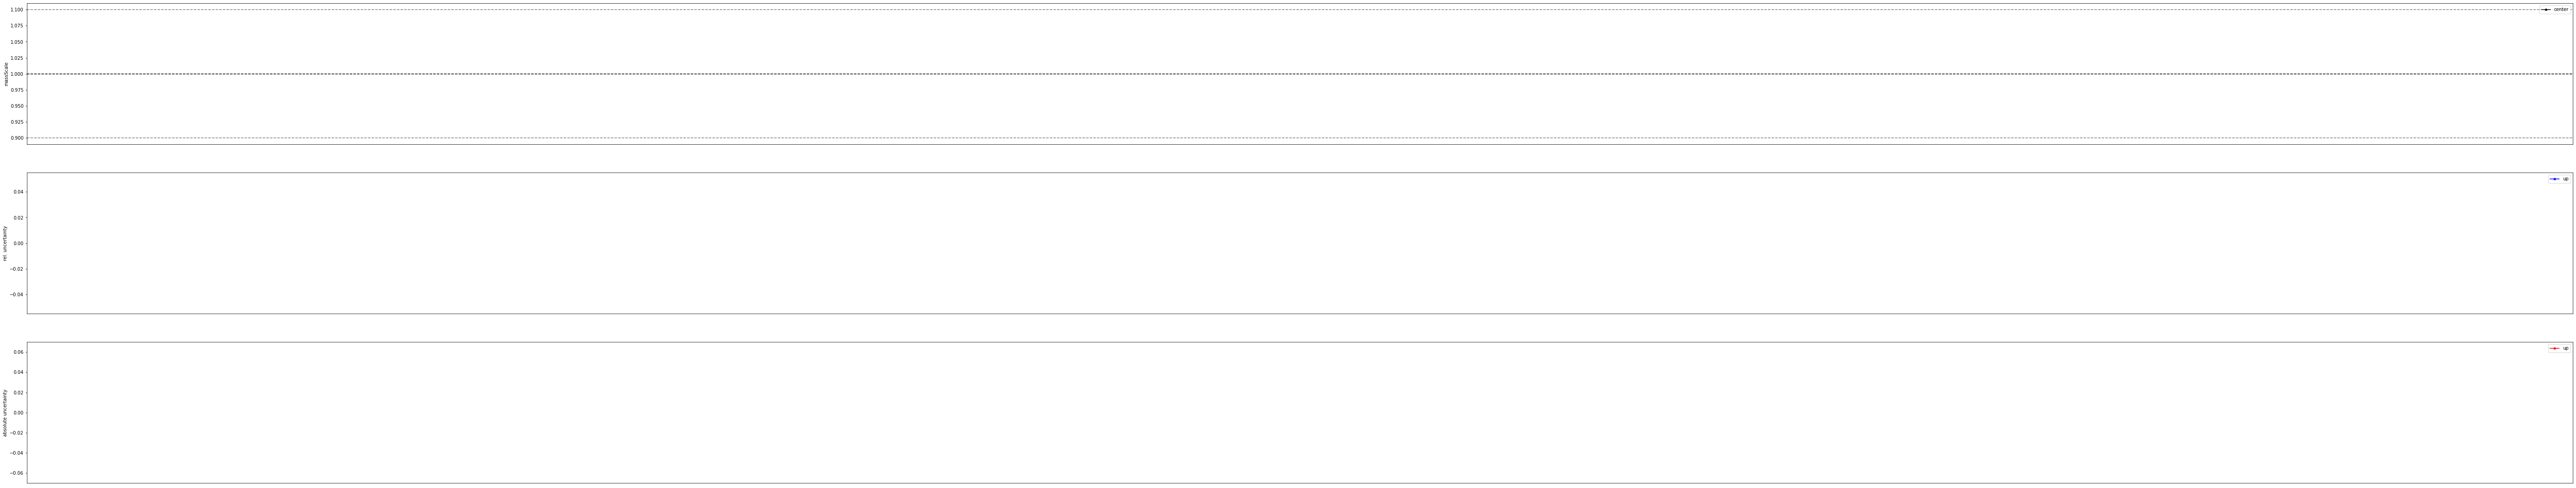

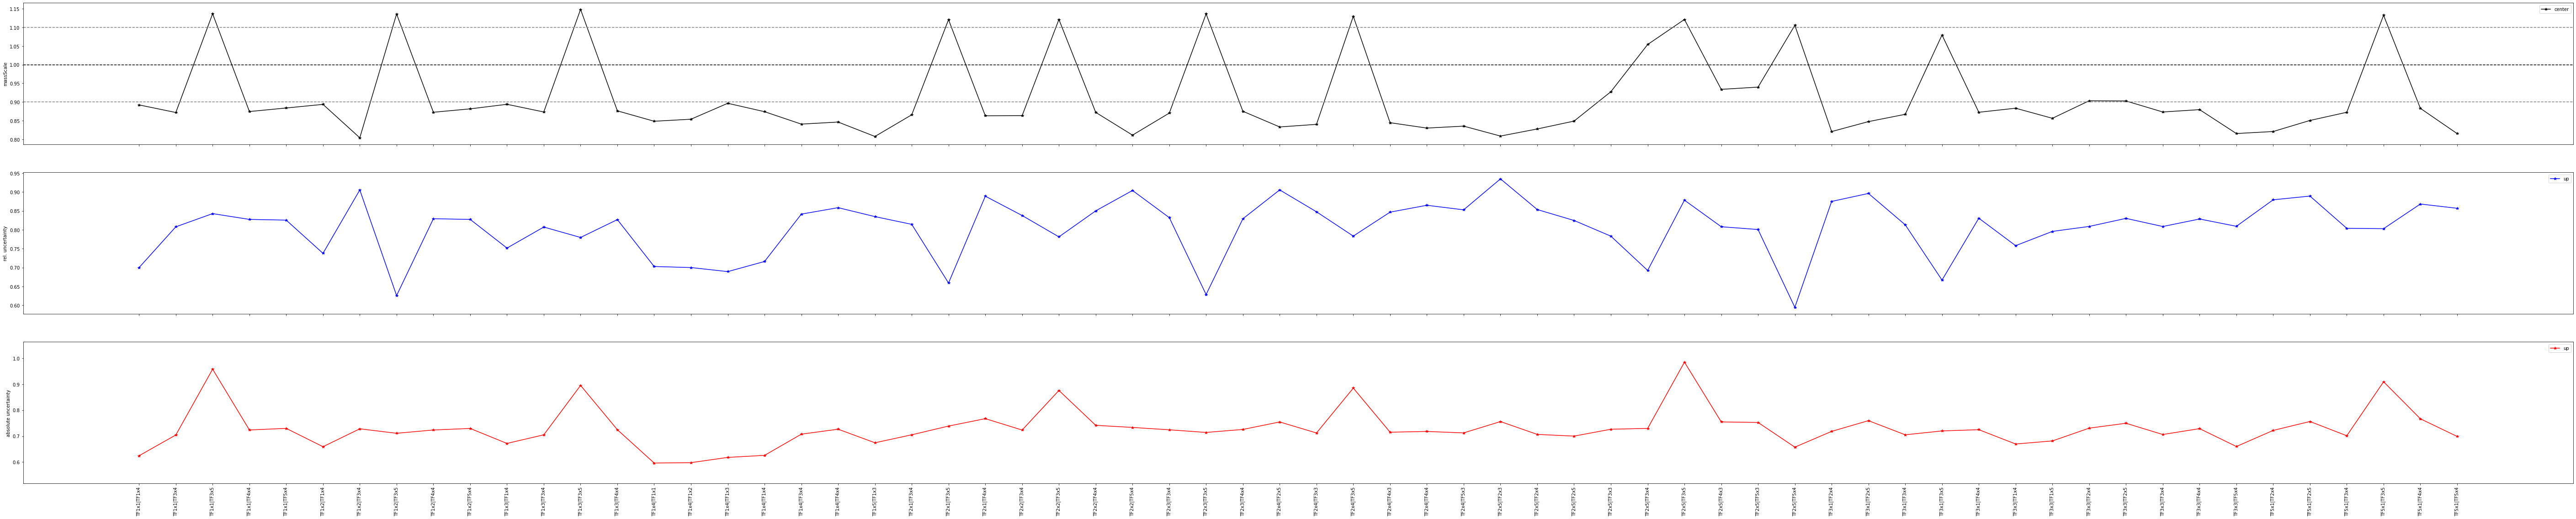

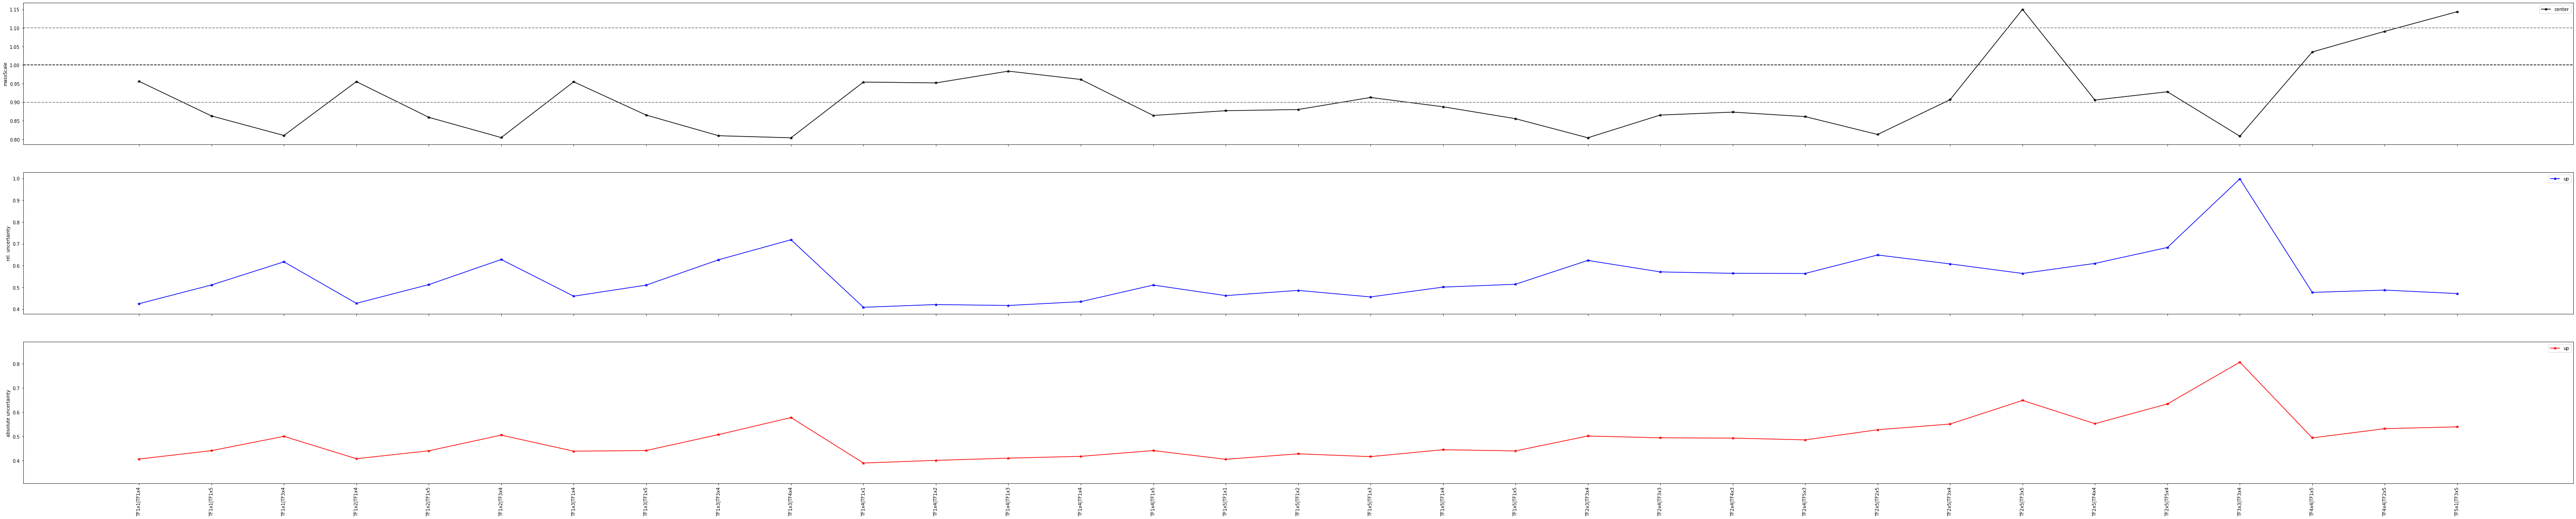

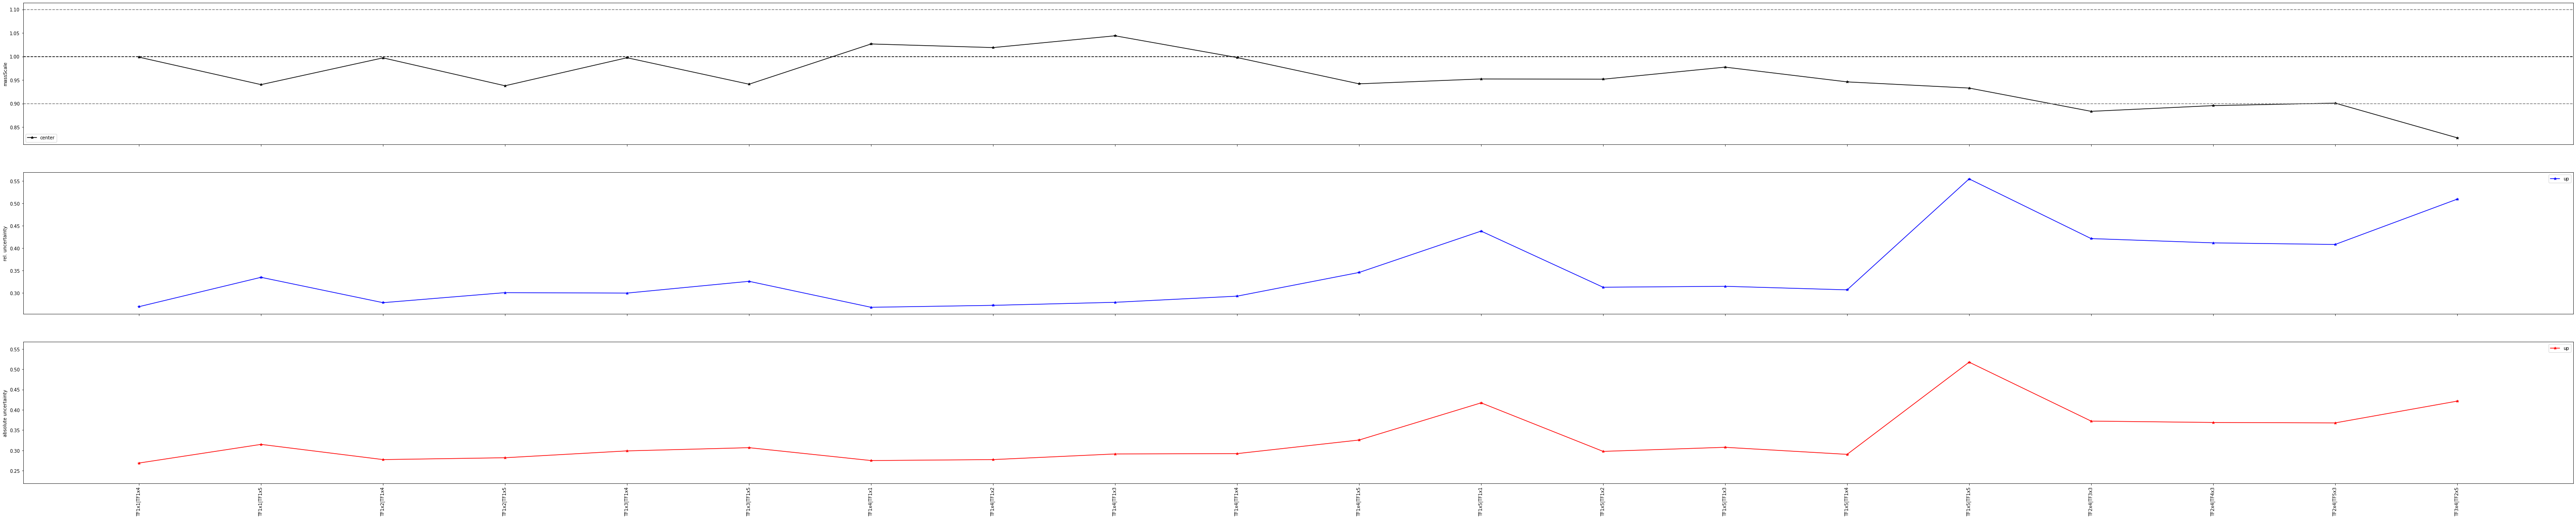

In [196]:
for i in range(len(lumis)):
    get_minimum_rel_uncertainty(i)
    
    plot_TF_scan_overview(i)
